In [4]:
import pandas as pd
import sklearn.mixture as gmm
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import warnings

In [6]:
hfi= pd.read_csv('hfi_cc_2018.csv')
hfi

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


2.278265902904456


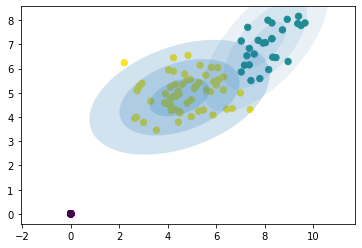

In [10]:
x= hfi.drop(['year', 'ISO_code', 'countries', 'region'], axis= 1)
x= x.fillna(0)
x= np.array(x.iloc[:,0:2])

k_fold= KFold(n_splits= 10)
k_fold.get_n_splits(x)

gm= gmm.GaussianMixture(n_components= 3, warm_start= False, init_params= 'kmeans')

results= []
for train_index, test_index in k_fold.split(x):
    x_train, x_test= x[train_index], x[test_index]
    gm.fit(x_train)
    results.append(gm.score(x_test))
print(np.mean(results))

y_predict= gm.predict(x_test)

plt.subplot(1,1,1)
ax= plt.gca()

ax.scatter(x_test[:,0], x_test[:,1], c=y_predict, s=40, cmap='viridis')

ax.axis('equal')

w_factor= 0.2/gm.weights_.max()

for pos,covar, weights in zip(gm.means_, gm.covariances_, gm.weights_):
    U, s,vt= np.linalg.svd(covar)
    angle= np.degrees(np.arctan2(U[1,0], U[0,0]))
    width, height= 2*np.sqrt(s)
    
    # Draw the EL+lipse
    for center in range(1,4):
        ax.add_patch(Ellipse(pos, center*width, center*height, angle, alpha= weights*w_factor))
plt.show()

In [ ]:
## CONCLUSION: My score is about 2.2 and model was able to segment 3 components.